In [425]:
from lxml import etree
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tiktoken
# How to use tiktoken: https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo") # Encoding 'cl100k_base'

In [426]:
from pathlib import Path

udhr_dir = Path('data/udhr')
token_dfs = {}

for filename in udhr_dir.glob('*.xml'):
    language = filename.stem[5:]
    if language == 'deu_1996':
        language = 'deu'
    print(language, end=' ')

    with open(filename) as f:
        tree = etree.parse(f)

    text = '\n'.join([tree.find('{http://www.unicode.org/udhr}title').text] + 
        [p.text for p in tree.find('{http://www.unicode.org/udhr}preamble').findall('.//{http://www.unicode.org/udhr}para')] +
        [p.text for article in tree.findall('{http://www.unicode.org/udhr}article')
                for p in article.findall('.//{http://www.unicode.org/udhr}para')])

    token_codes = encoding.encode(text)
    df = pd.DataFrame({'decoded': [encoding.decode([token]) for token in token_codes]}).drop_duplicates()
    df['length'] = df['decoded'].str.len()
    df['byte_length'] = df['decoded'].apply(lambda d: len(d.encode('utf-8')))
    token_dfs[language] = df

spa uig_latn cat tam ind fin als heb kaz uzn_cyrl fra azj_latn pes_1 ben gle pan lit kor srp_cyrl hun est tgl arb vie swe tha cmn_hant isl tgk kir nob cmn_hans tel bul mkd dan por_BR srp_latn lad deu nld lav swh ces lat ell_monotonic nno khk mar rus ita ukr por_PT hrv cym urd tur pol eng jpn hin 

In [427]:
TokenStatsByLanguage = pd.concat([pd.DataFrame({'lang': lang, 'stat': df.byte_length.describe()}) 
           for lang, df in token_dfs.items()]).reset_index(
           ).set_index(['lang','index']).unstack()['stat'].sort_values('count', ascending=False)

TokenStatsByLanguage

index,25%,50%,75%,count,max,mean,min,std
lang,,,,,,,,
deu,3.0,4.0,5.00,900.0,14.0,4.102222,1.0,1.738332
ita,3.0,4.0,5.00,841.0,12.0,4.287753,1.0,1.919314
fra,3.0,4.0,6.00,839.0,15.0,4.889154,1.0,2.466165
por_PT,3.0,4.0,6.00,826.0,15.0,4.690073,1.0,2.173855
pol,2.0,3.0,4.00,783.0,10.0,3.274585,1.0,1.366368
...,...,...,...,...,...,...,...,...
heb,2.0,2.0,3.00,30.0,5.0,2.333333,1.0,1.028334
ben,2.0,3.0,3.00,17.0,6.0,3.058824,1.0,1.675955
tam,1.0,2.5,3.25,16.0,6.0,2.687500,1.0,1.662077


In [428]:
TokenStatsByLanguage[['mean','count']]

index,mean,count
lang,,
deu,4.102222,900.0
ita,4.287753,841.0
fra,4.889154,839.0
por_PT,4.690073,826.0
pol,3.274585,783.0
...,...,...
heb,2.333333,30.0
ben,3.058824,17.0
tam,2.687500,16.0


In [467]:
N = np.asarray([100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
x = (np.sqrt(90000 + N * 300) - 300) / 100
y = N / y

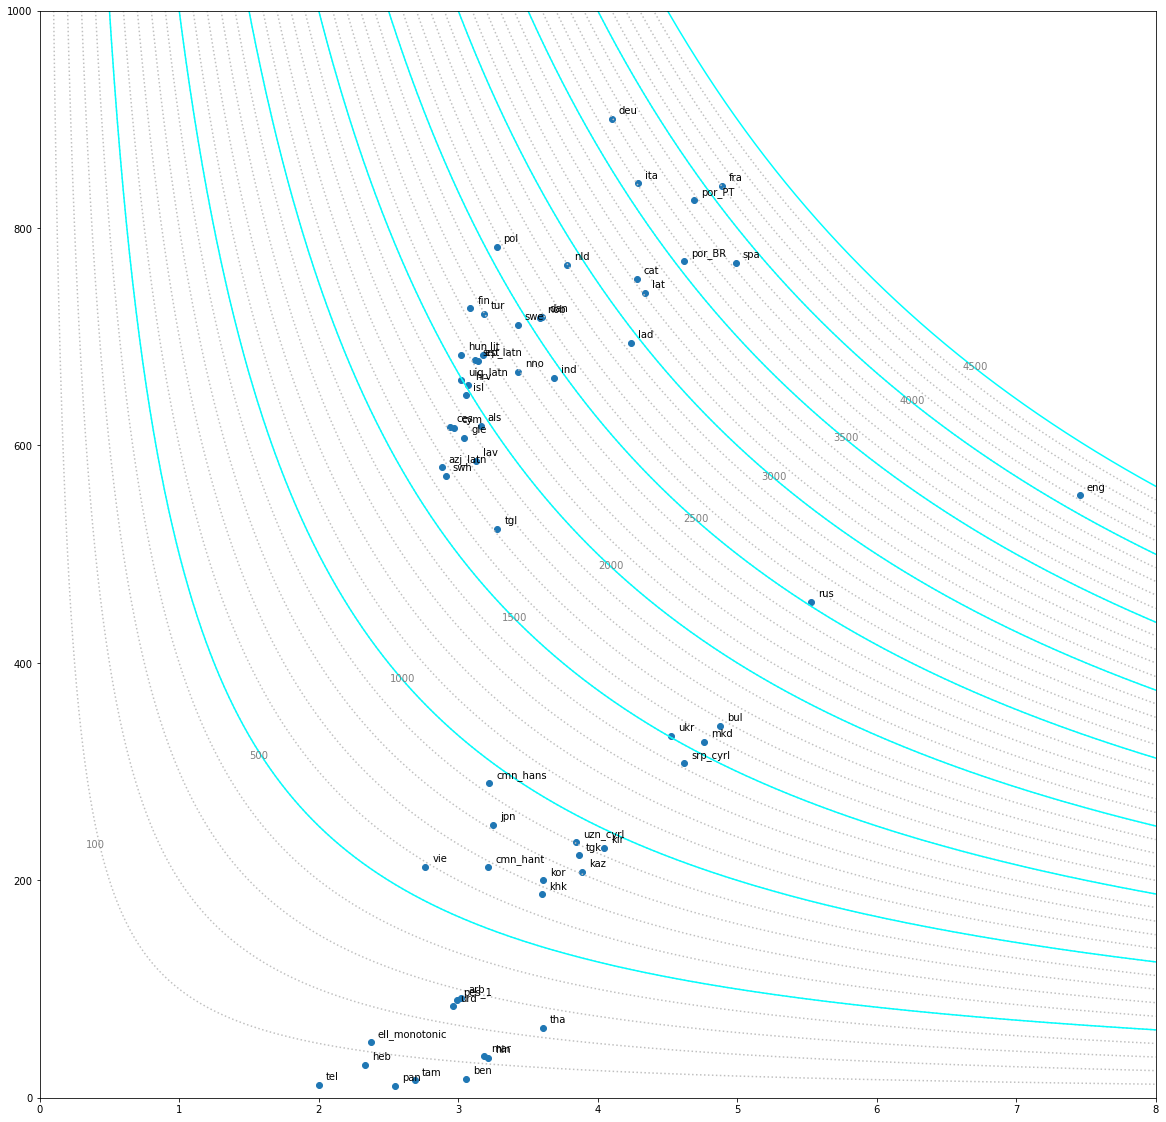

In [492]:
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(TokenStatsByLanguage['mean'], TokenStatsByLanguage['count'])
ax.set_xlim([0,8])
ax.set_ylim([0, 1000])

for i, txt in enumerate(TokenStatsByLanguage.index):
    ax.annotate(txt, (TokenStatsByLanguage['mean'][i] + 0.05, TokenStatsByLanguage['count'][i] + 5))

x = np.arange(0.001, 8, 0.001)
for param in range(100, 4500, 100):
    ax.plot(x, param/x, color='silver', ls=':')
for param in [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]:
    ax.plot(x, param/x, color='cyan')


N = np.asarray([100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])
x = (np.sqrt(40000 + N * 280) - 200) / 140
y = N / x

for i in range(len(N)):
    ax.annotate(str(N[i]), (x[i] - 0.1, y[i]), color='grey')




In [430]:
500 / np.arange(0, 8, 0.001)

/var/folders/g7/8vxyyp0n0sz9vxw2bpxdd4jc0000gn/T/ipykernel_33799/1626100401.py:1: RuntimeWarning: divide by zero encountered in true_divide
  500 / np.arange(0, 8, 0.001)


array([           inf, 5.00000000e+05, 2.50000000e+05, ...,
       6.25234463e+01, 6.25156289e+01, 6.25078135e+01])

In [431]:
(lambda df:df[df['byte_length'] > 13])(token_dfs['rus'])

,decoded,length,byte_length
249,обходим,7,14
648,значение,9,17
2339,использов,10,19
3836,который,8,15
4461,результат,10,19
